In [10]:
# (%matplotlib inline : jupyter에서만 사용)
%matplotlib inline
import matplotlib.pyplot as plt # 시각화
import mglearn # 학습도움

# MDS 행렬곱을 위한 임의의 직교하는 2,3차원 구하는 방식
#   1) 랜덤사이즈를 채운 후에 행렬제곱 => 정방행렬/대칭행렬
#   2) 고윳값 분해 -> 고유치, 고유벡터를 구하여 정직교하는 행렬 구한다.
# MDS 행렬곱(임의의 직교하는 2,3차원) : 2차원이나 3차원으로 특징 추출
#
# forward propagation(순전파) : 예측/분류 과정(가중치가 random하게 초기화)
# backward propagation(역전파) : 가중치 학습과정(cost function의 기울기, learning rate)
#
# MLP : MultiLayer perceptron : FFNN(Feed Forward Neural Network)
# Solver의 역할 - 미분, learning rate조절 => 가중치 조절
# Estimator, Transformer
from sklearn.neural_network import MLPClassifier # MLPRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


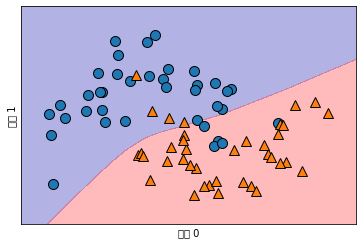

In [12]:
# stratify 층화 변수 선택법
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

# Multilayer => XOR문제를 해결, 레이어가 많으면 정밀도 자동으로 높아진다.
mlp = MLPClassifier(random_state = 0).fit(X_train, y_train)
# 가중치가 완성 - 레이어 지정 자동으로 MLPClassifier가 가중레이어를 지정
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [15]:
mlp.get_params() # default 매개변수 확인
# (activation function) relu - 0이하를 제거한 활성화 함수
# 속도가 빨라진다.
# epoch : 1회 반복
#
# Adam : learning rate 조절, momentum 사용하는 optimizer(최적화기)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
mlp.n_layers_

3

In [24]:
mlp.coefs_ # coefficient
# bias : 계수들이 0으로 가는 것을 방지하기 위해서 초기값=1로 setting

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [28]:
mlp.classes_

array([0, 1], dtype=int64)

In [33]:
mlp.n_outputs_

1

Text(0, 0.5, '특성 1')

C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


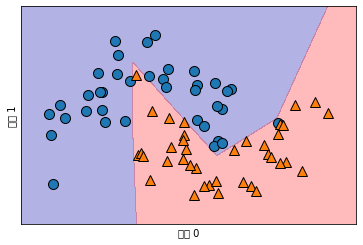

In [50]:
# 레이어를 10개 이상주면 기울기 소실 문제가 발생한다.
# Multilayer => XOR문제를 해결, 정확도 높아지는 것 발견
mlp = MLPClassifier(solver = "lbfgs", # 과적합
                    random_state = 0, hidden_layer_sizes = [5,10]) # hidden_layer_sizes = [10]

# SVM(Support Vector Machine)의 논리
#  - 고차원으로 데이터 확대(고차원을 선호하는 모델)
#  - 정확도가 높다.
#  - 과적합 방지
#  - SVC(Classifier), SVR(Regressor)
#
# hidden_layer_sizes 지정 시 무엇을 지정하는가?
#  -> 출력차수만 지정해주면 된다. => 추출할 특성수
# 2(입력차수)X10, 10X10
#
# hidden_layer_sizes = [5,10]
# 2 X 5, 5 X 10
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [51]:
# BlackBox:알수없는 값들로 이루어짐 => 원인 규명
mlp.coefs_
# x, y좌표로
# 2 X 10, bias=10
# 변수는 2 X 10, 10 X 10
# 5, 10
# 레이어 사이즈를 지정 출력차수만 지정(5,10) : 입력데이터
# 2 X 5, 5 X 10

[array([[  9.58312525,   8.01326616,   6.38324831, -13.90108441,
          -0.14108705],
        [ -0.15831136,   3.390681  ,   2.98670712,  -1.16530986,
          -0.21540178]]),
 array([[-1.02891626, -2.33889475,  2.12972828,  0.52897872,  2.23957507,
          1.41874928,  0.148644  ,  0.34437075,  7.28226381, -0.48186345],
        [-0.81302935, -0.46973462, -0.01110334, -0.25503688, -0.09567239,
          1.07167377,  2.44161204,  0.06323068,  3.11978885, -0.63798754],
        [-0.40855756, -1.01425374,  1.89146083,  0.85156843,  2.19939312,
          1.2517127 , -2.10707856,  0.65408844,  1.40739894,  0.20930688],
        [-0.68852893,  2.66493476, -1.5262621 ,  0.33742273, -3.40176253,
         -2.50208501, -0.81709543,  3.96204422,  0.37740612, -0.58969023],
        [-0.4275745 ,  0.19328921, -0.31145316, -0.04253044, -0.32264591,
         -0.43052851, -0.49187581,  0.19735584, -0.45677027, -0.38304485]]),
 array([[-0.65227553],
        [-3.54750216],
        [-3.3272718 ],
    

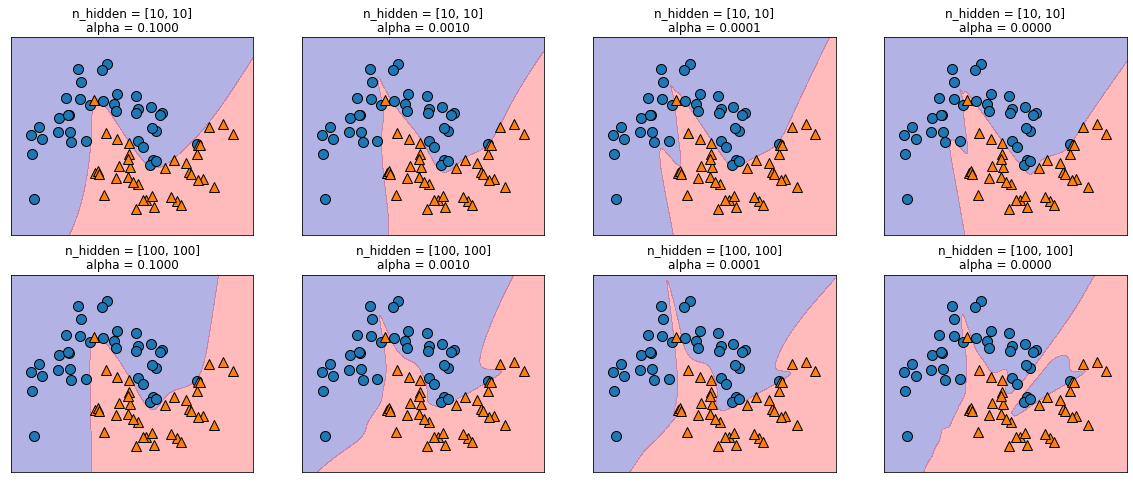

In [61]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]): # hidden nodes 수 [10, 100]
    for ax, alpha in zip(axx, [0.1, 0.001, 0.0001, 0.00001]):
        mlp = MLPClassifier(solver = "lbfgs", random_state = 0, activation = "tanh",
                           hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],
                           alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title("n_hidden = [{}, {}]\nalpha = {:.4f}".format(n_hidden_nodes, 
                                                               n_hidden_nodes, 
                                                               alpha))
# 규제가 적어지면 곡선형 -> 과적합?

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis = 0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train) # fit => 가중치 결정
print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train))) # 94%
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test))) # 92%
mlp

# train 데이터의 정확도가 적으면 과소적합
#  => 데이터를 늘린다. alpha값을 늘린다. 가중치 조절한다. (parameter tunning)

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [84]:
mean_on_train = X_train.mean(axis = 0) # 평균
std_on_train = X_train.std(axis = 0)   # 표준편차

# Z점수 표준화
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train))) # 99.1%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 95.5%

[1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]
훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [71]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train))) # 100%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97.2%

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [73]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train))) # 98.8%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97.2%

# = 정확도가 둘이 비슷해졌다 => 일반화되었다.(좋은 경우)

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [75]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

(569, 30)


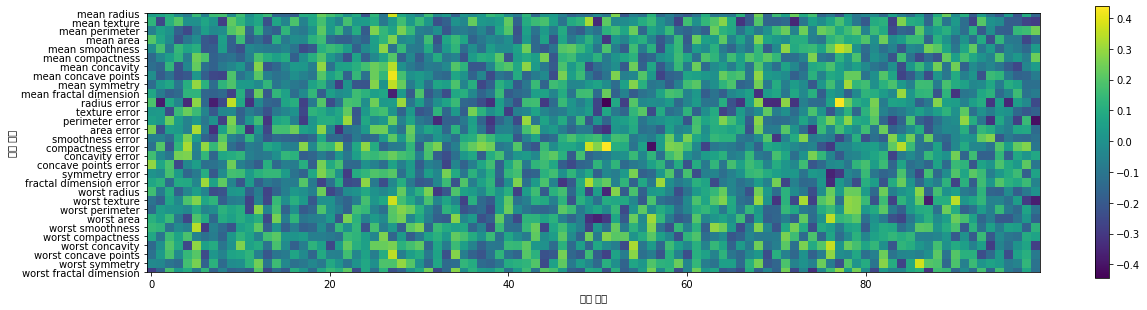

In [91]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = "none", cmap = "viridis")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [109]:
import pandas as pd

# 178개의 관측치, 14개의 변수
wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
wine.shape
X = wine.drop("Cultivator", axis = 1) # Cultivor만 제거한 것
y = wine["Cultivator"]                # Cultivor만 있는 것

In [110]:
from sklearn.model_selection import train_test_split
# 75%(훈련데이터) : 25%(테스트데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
print(y.unique())

[1 2 3]


In [149]:
# 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# StandardScaler(copy = True, with_mean = True, wirh_std = True)
# copy = True : 원본은 그대로 유지(False:원본도 수정)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
from sklearn.neural_network import MLPClassifier
# hidden_layer_sizes의 default = (100,)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [125]:
from sklearn.metrics import classification_report, confusion_matrix
# precision : 정밀도 = TP / (TP + FP) -> 예측을 중심으로 생각
# recall    : 재현율 = TP / (TP + TN) -> 실제값을 중심으로 생각
# f1-score  : 2 * (precision * recall) / (precision + recall)
# report 결과에서 행마다 있는 숫자는 unique()값과 동일
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[16  0  0]
 [ 0 19  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '입력 특성')

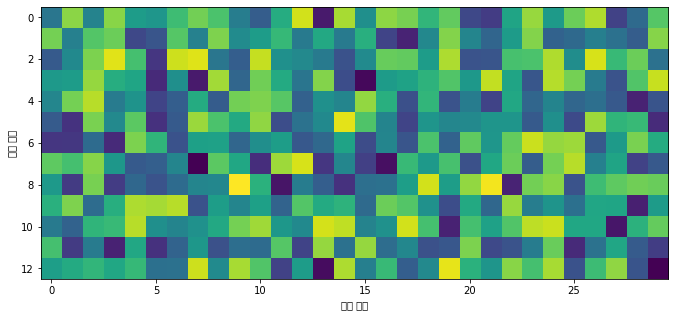

In [128]:
print(mlp.coefs_[0].shape) # 13 X 30
print(mlp.coefs_[1].shape) # 30 X 30
print(mlp.coefs_[2].shape) # 30 X 30
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")

In [129]:
# NMF(Non-Negative Matrix factorization) : 비음수행렬 분해
#  - PCA는 음수와 양수의 차이를 상계해서 처리
#  - 양수인 데이터에 적용 ex)음성데이터, signal

C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 

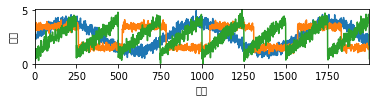

In [138]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [139]:
import numpy as np
# Noise : 전송 데이터
A = np.random.RandomState(0).uniform(size = (100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태 : {}".format(X.shape))

측정 데이터 형태 : (2000, 100)


In [140]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태 : {}".format(S.shape))

복원한 신호 데이터 형태 : (2000, 3)


In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

In [146]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

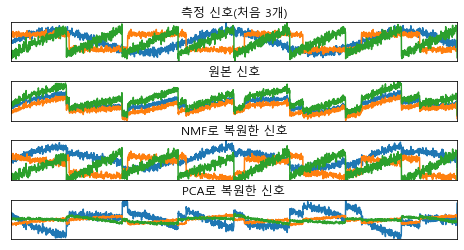

In [148]:
models = [S, X, S_, H] # 원본, 노이즈, NMF, PCA
# 양수 데이터는 noise를 제거하지 못한다.
names = ["측정 신호(처음 3개)", "원본 신호", "NMF로 복원한 신호", "PCA로 복원한 신호"]
fig, axes = plt.subplots(4, figsize = (8,4), gridspec_kw = {"hspace":.5},
                        subplot_kw = {"xticks":(), "yticks":()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], "-")
    ax.margins(0)

In [ ]:
# 군집분석 시각화